In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("telcom_data.csv")

# Task 4.1 

###  engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

# Engagement analysis

In [3]:
session_frequency = data.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [4]:
len(session_frequency)

150001

In [5]:
# Calculate session duration by subtracting "End ms" from "Start ms"
Session_Duration = data['Dur. (ms)']
len(Session_Duration)

150001

In [6]:
total_traffic = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
len(total_traffic)

150001

In [7]:
data['Session Frequency'] = session_frequency
data['Session Duration'] = Session_Duration
data['Total Traffic'] = total_traffic

In [8]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Frequency,Session Duration,Total Traffic
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,2.0,1823652.0,345629377.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,2.0,1365104.0,707185356.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.0,1361762.0,307690973.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.0,1321509.0,889352748.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.0,1089009.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,1.0,81230.0,631804110.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,2.0,97970.0,705783925.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.0,98249.0,627698629.0
149999,1.311450e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.0,97910.0,401522016.0


In [9]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [10]:
# Aggregate the metrics per customer id (MSISDN) and report the top 10 customers per engagement metric
aggregated_data = data.groupby('MSISDN/Number').agg({
    'Session Frequency': 'sum',
    'Session Duration': 'sum',
    'Total Traffic': 'sum',})

In [11]:
aggregated_data

,Session Frequency,Session Duration,Total Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197020e+12,1.0,877385.0,2.321240e+08


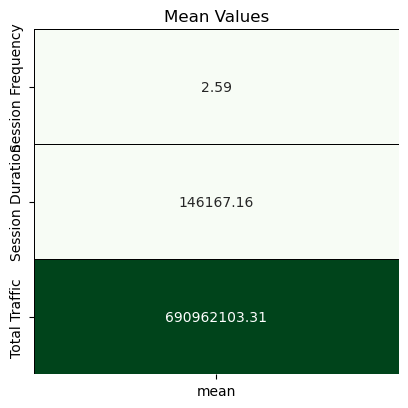

In [12]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#7789B2','#7789B2']
plt.subplot(1,1,1)
sns.heatmap(aggregated_data.describe().T[['mean']],
            cmap = 'Greens',
            annot = True,
            fmt = '.2f',
            linecolor = 'black',
            linewidths = 0.4,
            cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

#### Data Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
from sklearn.cluster import KMeans
kmeans=KMeans()

In [14]:
aggregated_data['Session Frequency']=mms.fit_transform(aggregated_data[['Session Frequency']])
aggregated_data['Session Duration']=mms.fit_transform(aggregated_data[['Session Duration']])
aggregated_data['Total Traffic']=mms.fit_transform(aggregated_data[['Total Traffic']])


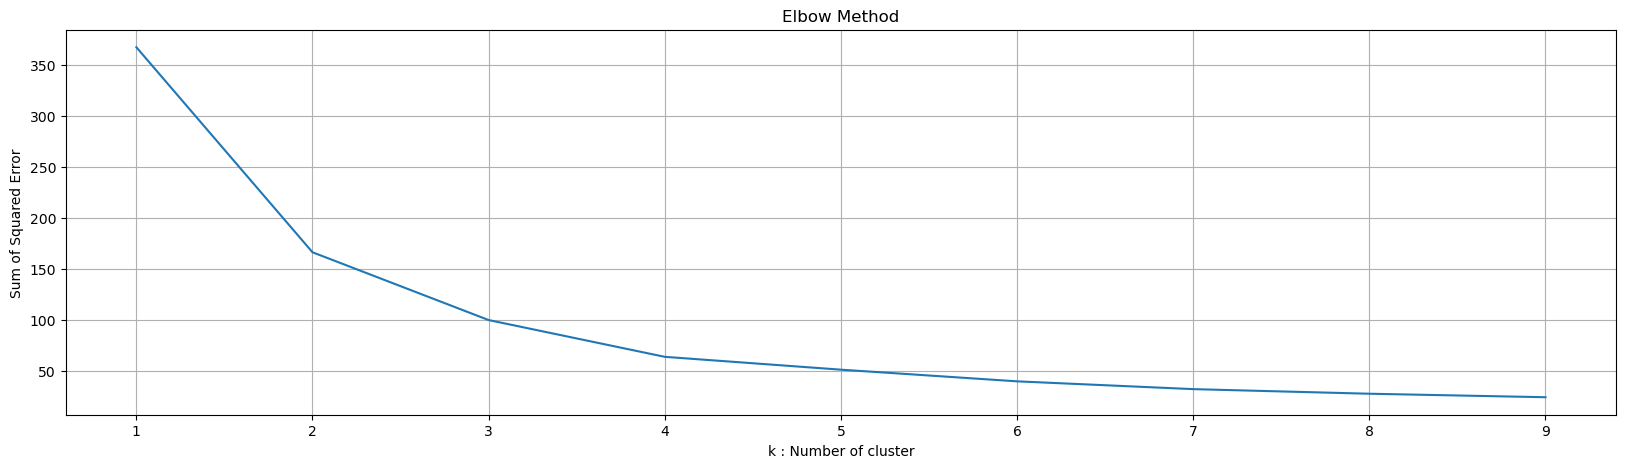

In [15]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(aggregated_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [16]:
user_data = aggregated_data[['Session Frequency', 'Session Duration', 'Total Traffic']].values

In [17]:
model = KMeans(n_clusters = 2,
               max_iter = 1000)

In [18]:
model.fit(user_data)

KMeans(max_iter=1000, n_clusters=2)

In [19]:
# Finding the cluster centroids
cluster = model.cluster_centers_

In [20]:
cluster

array([[0.00149731, 0.00591895, 0.05700648],
       [0.02481307, 0.01663128, 0.17671824]])

In [21]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
centroids = np.array(cluster)

In [23]:
centroids

array([[0.00149731, 0.00591895, 0.05700648],
       [0.02481307, 0.01663128, 0.17671824]])

In [24]:

from sklearn.metrics.pairwise import euclidean_distances





distances = euclidean_distances(user_data, centroids)

less_engaged_cluster_index = 0

engagement_scores = distances[:, less_engaged_cluster_index]

mms = MinMaxScaler()
engagement_scores = mms.fit_transform(engagement_scores.reshape(-1, 1))

aggregated_data['Engagement Score'] = engagement_scores


aggregated_data

,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,0.000000,0.005908,0.095931,0.023262
3.360100e+10,0.000000,0.009387,0.014026,0.025866
3.360100e+10,0.000000,0.006892,0.063851,0.003462
3.360101e+10,0.000000,0.002304,0.044148,0.007417
3.360101e+10,0.009288,0.001615,0.161598,0.064264
...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.077317,0.012225
3.379000e+10,0.000000,0.007217,0.050727,0.003158
3.197020e+12,0.000000,0.046922,0.022566,0.032340


#### Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster. 

#  Experience  analysis

In [26]:
# Calculate average TCP retransmission
avg_tcp_retransmission = data.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)

In [27]:
# Calculate average RTT
avg_rtt = data.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

In [28]:
# Calculate average throughput
avg_throughput = data.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)
avg_throughput.fillna(avg_throughput.mean(), inplace=True)

In [29]:
handset_mode = data.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)


In [30]:
# Create a new DataFrame with aggregated information
aggregated_data1 = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
})

# Reset the index to make 'MSISDN/Number' a column instead of the index
aggregated_data1.reset_index(inplace=True)

# Display the aggregated data
aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput
0,3.360100e+10,8.463363e+06,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
1,3.360100e+10,8.463363e+06,15.500000,Apple iPhone 7 (A1778),49.5
2,3.360100e+10,8.463363e+06,68.269961,undefined,48.5
3,3.360101e+10,1.066000e+03,42.000000,Apple iPhone 5S (A1457),124.0
4,3.360101e+10,4.685416e+06,29.750000,Apple iPhone Se (A1723),14211.0
...,...,...,...,...,...
106851,3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.5
106852,3.379000e+10,8.463363e+06,20.000000,Apple iPhone 8 Plus (A1897),58.0
106853,3.197020e+12,8.463363e+06,68.269961,Quectel Wireless. Quectel Ec25-E,0.5
106854,3.370000e+14,8.463363e+06,68.269961,Huawei B525S-23A,16.5


#### Data Scaling

In [31]:
aggregated_data1['Avg_TCP_Retransmission']=mms.fit_transform(aggregated_data1[['Avg_TCP_Retransmission']])
aggregated_data1['Avg_RTT']=mms.fit_transform(aggregated_data1[['Avg_RTT']])
aggregated_data1['Avg_Throughput']=mms.fit_transform(aggregated_data1[['Avg_Throughput']])


In [32]:

user_data = aggregated_data1[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].values



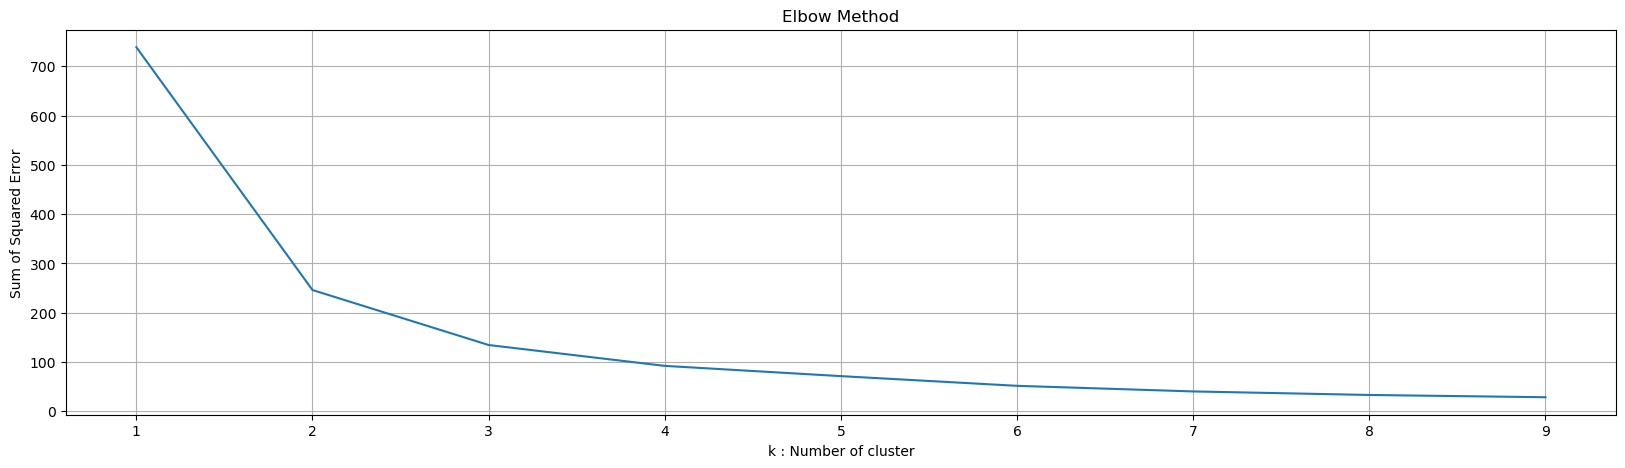

In [33]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [34]:
from sklearn.cluster import KMeans


In [35]:
model = KMeans(n_clusters = 2,
               max_iter = 1000)

In [36]:
model.fit(user_data)

KMeans(max_iter=1000, n_clusters=2)

In [37]:
# Finding the cluster centroids
cluster = model.cluster_centers_

In [38]:
cluster

array([[0.00199811, 0.0014808 , 0.0154323 ],
       [0.00623864, 0.00106067, 0.19551877]])

In [39]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
centroids= np.array(cluster)

In [41]:
centroids

array([[0.00199811, 0.0014808 , 0.0154323 ],
       [0.00623864, 0.00106067, 0.19551877]])

In [42]:
cluster_centroids = centroids

distances = euclidean_distances(user_data, cluster_centroids)

worst_experience_cluster_index = cluster_centroids.shape[0] - 1

experience_scores = distances[:, worst_experience_cluster_index]

mms = MinMaxScaler()
experience_scores = mms.fit_transform(experience_scores.reshape(-1, 1))

aggregated_data1['Experience Score'] = experience_scores

aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Experience Score
0,3.360100e+10,2.725529e-03,0.000475,Huawei P20 Lite Huawei Nova 3E,0.000268,0.191190
1,3.360100e+10,2.725529e-03,0.000320,Apple iPhone 7 (A1778),0.000349,0.191111
2,3.360100e+10,2.725529e-03,0.001409,undefined,0.000342,0.191117
3,3.360101e+10,3.426491e-07,0.000867,Apple iPhone 5S (A1457),0.000873,0.190661
4,3.360101e+10,1.508884e-03,0.000614,Apple iPhone Se (A1723),0.100102,0.093116
...,...,...,...,...,...,...
106851,3.379000e+10,3.510881e-05,0.000537,Huawei Honor 9 Lite,0.036505,0.155648
106852,3.379000e+10,2.725529e-03,0.000413,Apple iPhone 8 Plus (A1897),0.000409,0.191052
106853,3.197020e+12,2.725529e-03,0.001409,Quectel Wireless. Quectel Ec25-E,0.000004,0.191449
106854,3.370000e+14,2.725529e-03,0.001409,Huawei B525S-23A,0.000116,0.191339


In [43]:
aggregated_data

,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,0.000000,0.005908,0.095931,0.023262
3.360100e+10,0.000000,0.009387,0.014026,0.025866
3.360100e+10,0.000000,0.006892,0.063851,0.003462
3.360101e+10,0.000000,0.002304,0.044148,0.007417
3.360101e+10,0.009288,0.001615,0.161598,0.064264
...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.077317,0.012225
3.379000e+10,0.000000,0.007217,0.050727,0.003158
3.197020e+12,0.000000,0.046922,0.022566,0.032340


In [44]:
aggregated_data1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Experience Score
0,3.360100e+10,2.725529e-03,0.000475,Huawei P20 Lite Huawei Nova 3E,0.000268,0.191190
1,3.360100e+10,2.725529e-03,0.000320,Apple iPhone 7 (A1778),0.000349,0.191111
2,3.360100e+10,2.725529e-03,0.001409,undefined,0.000342,0.191117
3,3.360101e+10,3.426491e-07,0.000867,Apple iPhone 5S (A1457),0.000873,0.190661
4,3.360101e+10,1.508884e-03,0.000614,Apple iPhone Se (A1723),0.100102,0.093116
...,...,...,...,...,...,...
106851,3.379000e+10,3.510881e-05,0.000537,Huawei Honor 9 Lite,0.036505,0.155648
106852,3.379000e+10,2.725529e-03,0.000413,Apple iPhone 8 Plus (A1897),0.000409,0.191052
106853,3.197020e+12,2.725529e-03,0.001409,Quectel Wireless. Quectel Ec25-E,0.000004,0.191449
106854,3.370000e+14,2.725529e-03,0.001409,Huawei B525S-23A,0.000116,0.191339


#### Task 4.2 - Consider the average of both engagement & experience scores as the satisfaction  score & report the top 10 satisfied customer

In [45]:
df = pd.DataFrame({
    'MSISDN/Number': aggregated_data.index,
    'Engagement Score': aggregated_data['Engagement Score']
})

df = df.reset_index(drop=True)

df['Experience Score'] = experience_scores
df







,MSISDN/Number,Engagement Score,Experience Score
0,3.360100e+10,0.023262,0.191190
1,3.360100e+10,0.025866,0.191111
2,3.360100e+10,0.003462,0.191117
3,3.360101e+10,0.007417,0.190661
4,3.360101e+10,0.064264,0.093116
...,...,...,...
106851,3.379000e+10,0.012225,0.155648
106852,3.379000e+10,0.003158,0.191052
106853,3.197020e+12,0.032340,0.191449
106854,3.370000e+14,0.005386,0.191339


In [46]:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2


In [47]:
df['Satisfaction Score']

0         0.107226
1         0.108489
2         0.097289
3         0.099039
4         0.078690
            ...   
106851    0.083937
106852    0.097105
106853    0.111895
106854    0.098362
106855    0.114081
Name: Satisfaction Score, Length: 106856, dtype: float64

In [48]:
df

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,0.023262,0.191190,0.107226
1,3.360100e+10,0.025866,0.191111,0.108489
2,3.360100e+10,0.003462,0.191117,0.097289
3,3.360101e+10,0.007417,0.190661,0.099039
4,3.360101e+10,0.064264,0.093116,0.078690
...,...,...,...,...
106851,3.379000e+10,0.012225,0.155648,0.083937
106852,3.379000e+10,0.003158,0.191052,0.097105
106853,3.197020e+12,0.032340,0.191449,0.111895
106854,3.370000e+14,0.005386,0.191339,0.098362


In [49]:
top_10_satisfied_customers = df.sort_values(by='Satisfaction Score', ascending=False).head(10)
print(top_10_satisfied_customers)

       MSISDN/Number  Engagement Score  Experience Score  Satisfaction Score
13180   3.362578e+10          1.000000          0.149069            0.574534
13526   3.362632e+10          0.861383          0.168190            0.514786
47983   3.366232e+10          0.019784          1.000000            0.509892
33226   3.365889e+10          0.001554          0.976328            0.488941
6437    3.361489e+10          0.869405          0.104751            0.487078
92923   3.376054e+10          0.770484          0.148713            0.459598
61964   3.366610e+10          0.001550          0.858241            0.429895
37052   3.365973e+10          0.714668          0.129679            0.422173
76363   3.367588e+10          0.690969          0.144523            0.417746
37838   3.365991e+10          0.007509          0.790177            0.398843


# Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
X = df[['Engagement Score', 'Experience Score']]
y = df['Satisfaction Score']


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Create a linear regression model
model = LinearRegression()

In [54]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [56]:
y_pred

array([0.0982728 , 0.09799078, 0.10471813, ..., 0.14474369, 0.08808696,
       0.06034656])

In [57]:
y_test

64473    0.098273
83243    0.097991
39296    0.104718
44869    0.074712
99282    0.098070
           ...   
67669    0.059082
63720    0.096079
16701    0.144744
44897    0.088087
97963    0.060347
Name: Satisfaction Score, Length: 21372, dtype: float64

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 8.452017137429469e-33


In [59]:
from sklearn.metrics import mean_absolute_error


In [60]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

In [61]:
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 7.371215208133387e-17


In [62]:
from sklearn.metrics import r2_score

In [63]:
r2 = r2_score(y_test, y_pred)

In [64]:
print("R-squared:", r2)

R-squared: 1.0


# Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

In [66]:
from sklearn.cluster import KMeans

In [67]:
# Prepare the data for clustering
data = df[['Engagement Score', 'Experience Score']]
X = data.values

In [68]:
# Run K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=2, random_state=42)

In [69]:
# Get the cluster labels
cluster_labels = kmeans.labels_

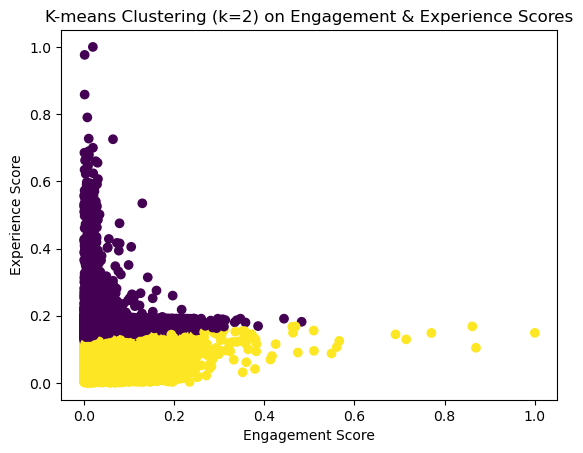

In [70]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering (k=2) on Engagement & Experience Scores')
plt.show()

# Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 

In [72]:
# Create a new DataFrame with cluster labels and satisfaction/experience scores
cluster_data = pd.DataFrame({'Cluster': cluster_labels, 'Satisfaction Score': df['Satisfaction Score'], 'Experience Score': df['Experience Score']})



In [73]:
# Calculate the average satisfaction and experience score per cluster
cluster_agg = cluster_data.groupby('Cluster').mean()



In [74]:
cluster_agg

,Satisfaction Score,Experience Score
Cluster,,
0,0.103143,0.185041
1,0.052295,0.070967


In [75]:
cluster_agg.columns

Index(['Satisfaction Score', 'Experience Score'], dtype='object')

These scores provide an overview of the average satisfaction and experience levels within each cluster. Cluster 0 has higher average scores compared to Cluster 1, indicating potentially higher satisfaction and better experiences for customers in Cluster 1.

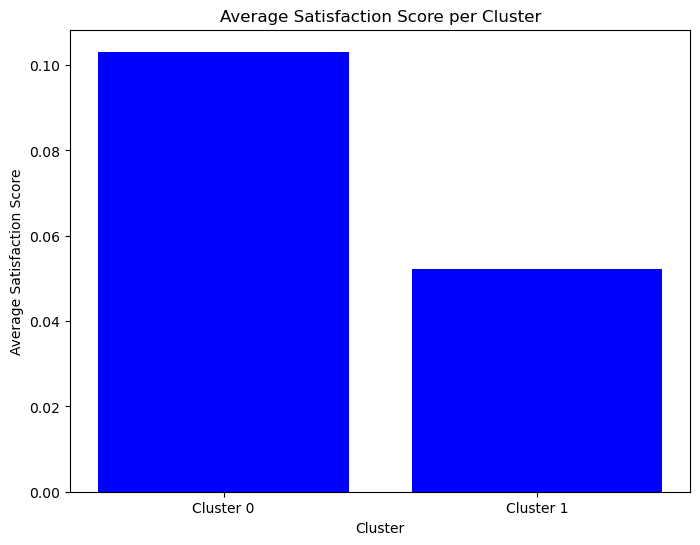

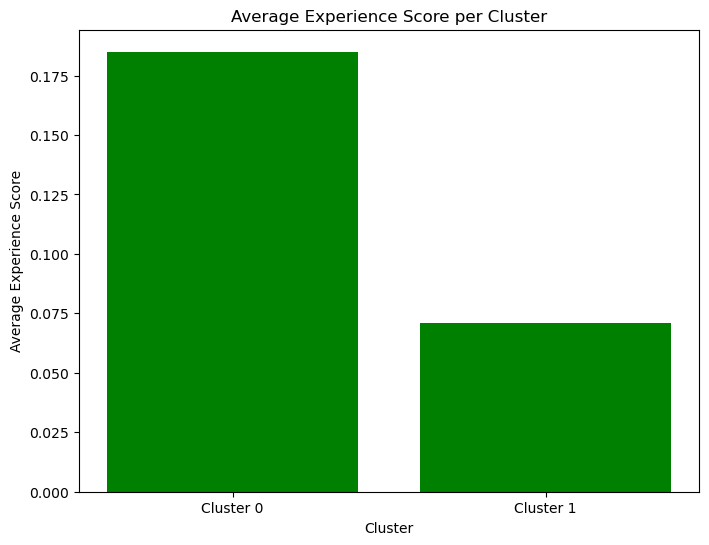

In [76]:
# Define the cluster labels and average scores
cluster_labels = ['Cluster 0', 'Cluster 1']
avg_satisfaction_scores = cluster_agg['Satisfaction Score']
avg_experience_scores =cluster_agg['Experience Score']

# Plot the average satisfaction scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_satisfaction_scores, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score per Cluster')

# Display the plot
plt.show()

# Plot the average experience scores
plt.figure(figsize=(8, 6))
plt.bar(cluster_labels, avg_experience_scores, color='green')
plt.xlabel('Cluster')
plt.ylabel('Average Experience Score')
plt.title('Average Experience Score per Cluster')

# Display the plot
plt.show()

In [77]:
df

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,0.023262,0.191190,0.107226
1,3.360100e+10,0.025866,0.191111,0.108489
2,3.360100e+10,0.003462,0.191117,0.097289
3,3.360101e+10,0.007417,0.190661,0.099039
4,3.360101e+10,0.064264,0.093116,0.078690
...,...,...,...,...
106851,3.379000e+10,0.012225,0.155648,0.083937
106852,3.379000e+10,0.003158,0.191052,0.097105
106853,3.197020e+12,0.032340,0.191449,0.111895
106854,3.370000e+14,0.005386,0.191339,0.098362


In [78]:
df.to_csv('Final_Table.csv')

In [79]:
excel_file_path = "output.xlsx"

In [80]:
df.to_excel(excel_file_path, index=False)

In [81]:
!pip install pyodbc

Defaulting to user installation because normal site-packages is not writeable


In [82]:
import pyodbc

In [83]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [ ]:
# Establish a connection to the SQL Server database
conn = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='MANILA',
    Database='Final_table'
)


In [ ]:
# SQL query to fetch data from a table
query = 'SELECT * FROM df'

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql(query, conn)